In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_regrets
from experiment import experiments_to_df

### Эксперимент

In [13]:
filepath = '../results/experiment_2-4.json'

seeds = 5 * np.arange(2, 5) + 111

params = Params(series_type = "default",
                from_start = False,
                a = -40,
                b = 40,
                dim = 10,
                low = -10,
                high = 10,
                clip = (-40, 40),
                workers_num = 3,
                length = 2000,
                lower_bound = 100,
                upper_bound = 400,
                alternating=True)

different_noises = [1]
different_windows = [5, 10, 20, 50, 100, 200]
different_wf = ["shift_10", "shift_100", "shift_1000"]
different_af = []


# experiments, df = run_experiments(filepath, seeds, params, different_noises, different_windows, different_wf, different_af)
experiments, df = load_experiments(filepath)

In [54]:
experiments0, df0 = load_experiments('../results/experiment_2-0.json')
experiments1, df1 = load_experiments('../results/experiment_2-1.json')
experiments2, df2 = load_experiments('../results/experiment_2-2.json')
experiments3, df3 = load_experiments('../results/experiment_2-3.json')
experiments4, df4 = load_experiments('../results/experiment_2-4.json')
df = experiments_to_df(experiments0 + experiments1 + experiments2 + experiments3 + experiments4)

In [55]:
os.stat(filepath).st_size

16541634

In [56]:
df

,noise_var,train_window,weight_function,alpha_function,regret,random_0,random_1,random_2
4,1,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),188586.09,259885.06,186360.94,119512.27
68,1,5,1 / (x^1.01),1 / (x + 10),141745.37,204795.64,148033.76,72406.72
69,1,5,1 / (x^1.01),1 / (x + 100),141322.14,204294.22,147869.67,71802.52
66,1,5,1 / (x^1.01),1 / (x + 1000),137917.23,200300.19,146370.27,67081.23
9,1,5,1 / (x^1.01),1 / (x + 1),141788.84,204847.13,148050.31,72469.09
...,...,...,...,...,...,...,...,...
125,1,200,1 / (x^0.8),1 / (x + 1),110505.85,129769.95,81349.07,120398.53
122,1,200,1 / (x^0.9),1 / (x + 1),111155.39,129788.51,81862.39,121815.28
141,1,200,1 / (x + 10),1 / (x + 1),109702.06,129181.03,80166.22,119758.93
142,1,200,1 / (x + 100),1 / (x + 1),109411.02,129702.44,80366.29,118164.32


In [73]:
interesting = ['const', 'diverge_01', 'diverge_02', 'diverge_05', 'diverge_08', 'diverge_09', 'simple_101', 'default']
mask = np.array([False] * len(df))
for t in interesting:
    mask |= (df["weight_function"] == weight_hypers[t].repr)
mask &= (df["alpha_function"] == alpha_hypers["default"].repr)
mask &= (df['train_window'] == 10)

In [74]:
df[mask].iloc[:, :5]

,noise_var,train_window,weight_function,alpha_function,regret
15,1,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),136360.61
20,1,10,1 / (x^1.01),1 / (x + 1),94758.81
71,1,10,1 / c,1 / (x + 1),83776.19
97,1,10,1 / (x^0.1),1 / (x + 1),80113.94
99,1,10,1 / (x^0.2),1 / (x + 1),78586.83
100,1,10,1 / (x^0.5),1 / (x + 1),77444.74
101,1,10,1 / (x^0.8),1 / (x + 1),82698.27
98,1,10,1 / (x^0.9),1 / (x + 1),87447.34


In [83]:
df_w = df[(df["alpha_function"] == alpha_hypers["default"].repr) & (df["train_window"] == 10)].iloc[:6,2:5]
print(df_w.to_latex(float_format="%.2f"))

\begin{tabular}{lllr}
\toprule
 & weight_function & alpha_function & regret \\
\midrule
15 & 1 / ((x + 1) * (ln(x + 1))^2) & 1 / (x + 1) & 136360.61 \\
20 & 1 / (x^1.01) & 1 / (x + 1) & 94758.81 \\
12 & 1 / (x^1.1) & 1 / (x + 1) & 98359.26 \\
21 & 1 / (x^2) & 1 / (x + 1) & 113298.39 \\
19 & 1 / e^(x/4) & 1 / (x + 1) & 425358.37 \\
13 & 1 / ((x + 4) * ln(x + 4) * (ln(ln(x + 4)))^2 & 1 / (x + 1) & 127634.11 \\
\bottomrule
\end{tabular}



In [18]:
# regret_simple = df[(df["weight_function"] == weight_hypers["simple_101"].repr) & (df["alpha_function"] == alpha_hypers["default"].repr)].iloc[:,4].values
# regret_const = df[df["weight_function"] == weight_hypers["const"].repr].iloc[:,4].values
# regret_slow = df[df["weight_function"] == weight_hypers["slow"].repr].iloc[:,4].values
# table = df[df["weight_function"] == weight_hypers["default"].repr].iloc[:,:5]
# table = table.drop(["weight_function", "noise_var"], axis=1).rename(columns={"regret": "default weight func regret"}).set_index("train_window", drop=True)
# table["1/x^1.01 weight func regret"] = regret_simple
# table["1/const weight func regret"] = regret_const
# table["slow weight func regret"] = regret_slow
# table
# print(table.to_latex(float_format="%.2f"))

In [101]:
df_r = df[(df["weight_function"] == weight_hypers["simple_101"].repr) & ((df["train_window"] == 10))].iloc[:,3:5]
print(df_r.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lr}
\toprule
alpha_function & regret \\
\midrule
1 / (x + 10) & 94729.22 \\
1 / (x + 100) & 94441.30 \\
1 / (x + 1000) & 92194.36 \\
1 / (x + 1) & 94758.81 \\
1 / (x + 1)^0.1 & 403703.32 \\
1 / (x + 1)^0.5 & 149472.52 \\
1 / (x + 1)^1.5 & 92351.58 \\
1 / (x + 1)^2) & 99120.36 \\
1 / e^(x/3) & 99477.13 \\
\bottomrule
\end{tabular}



In [20]:
df[["noise_var", "train_window", "regret"]].groupby(["noise_var", "train_window"]).mean()

regret
noise_var train_window               
1         5             123994.021667
          10             83437.766667
          20             96701.188333
          50            101705.875000
          100           104585.535000
          200           115855.556667

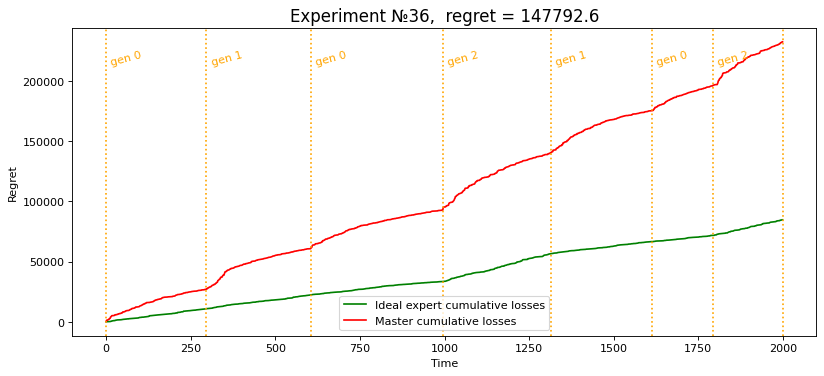

In [21]:
num = 36
experiment = experiments[num]
draw_regrets(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

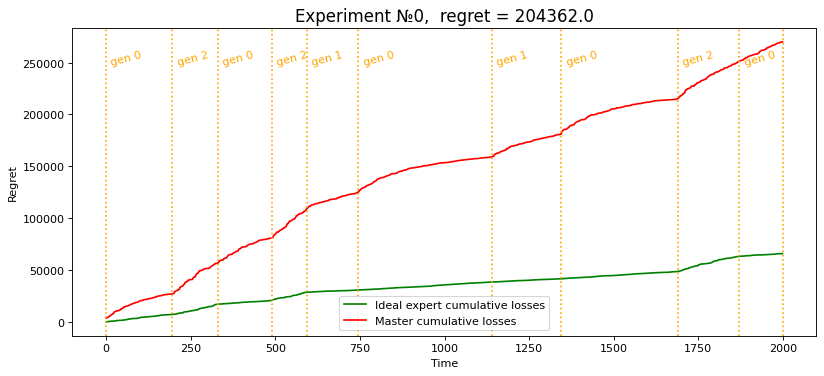

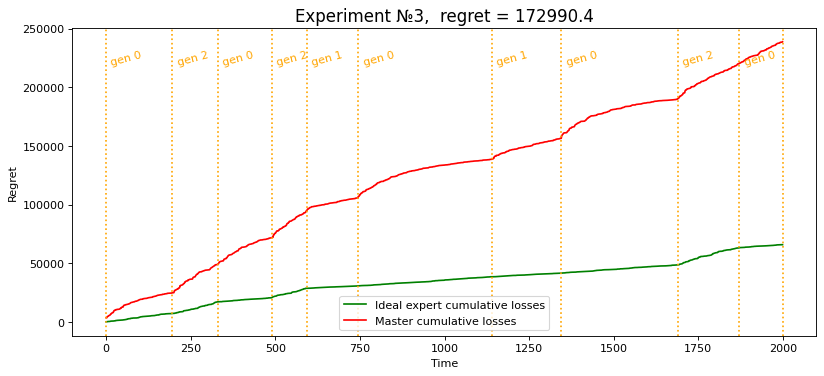

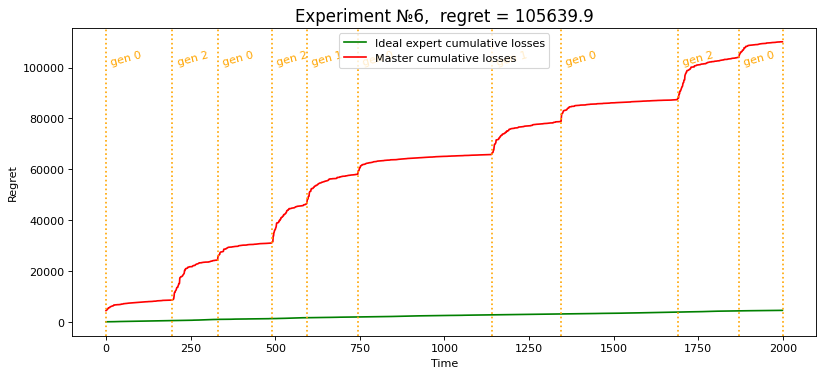

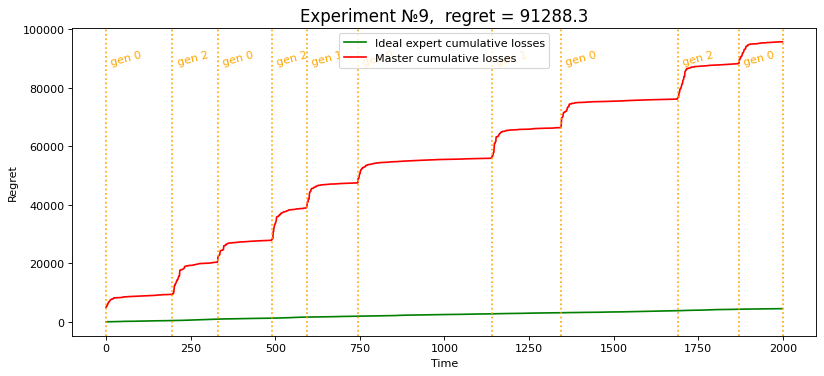

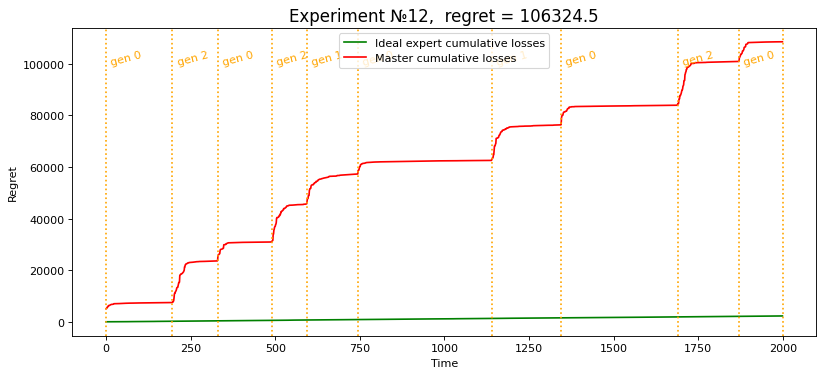

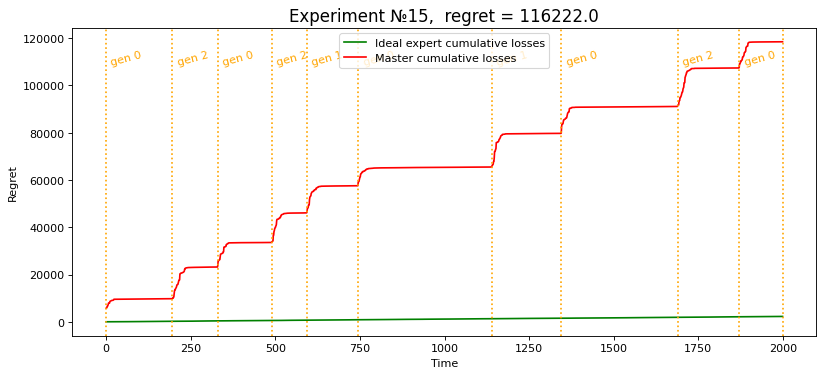

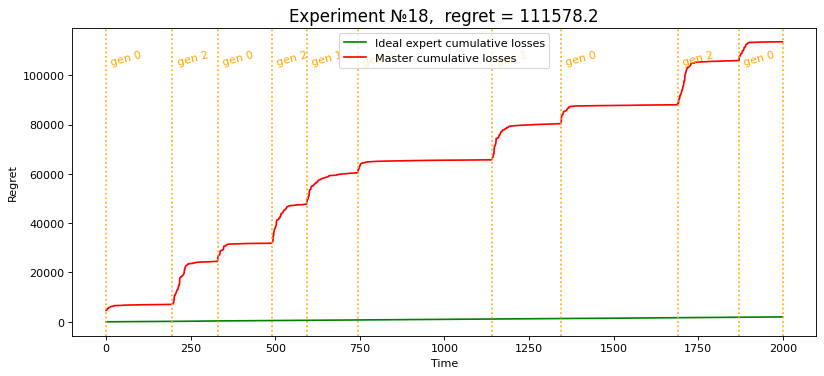

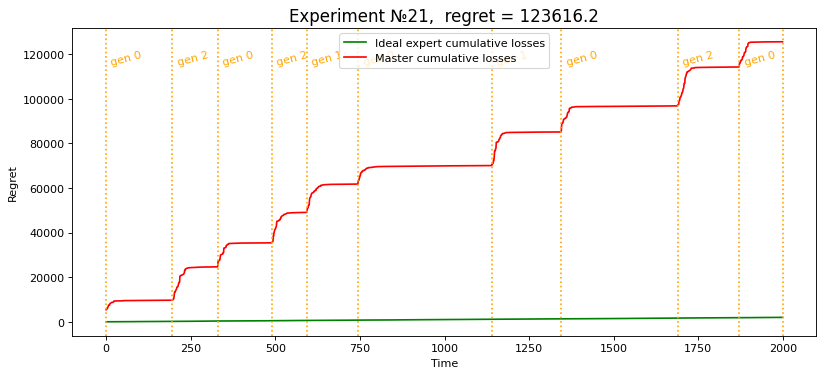

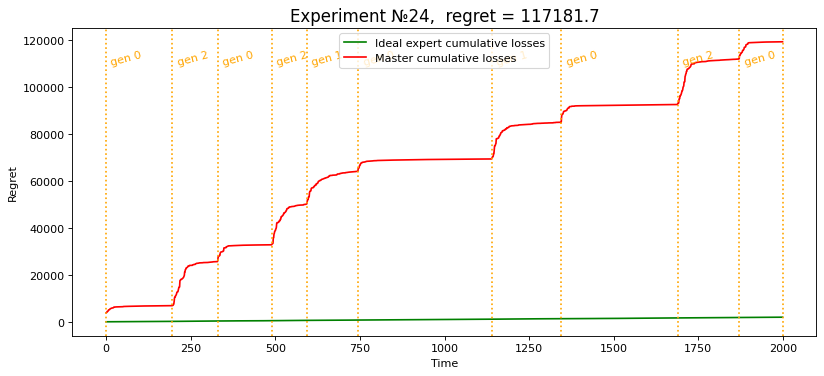

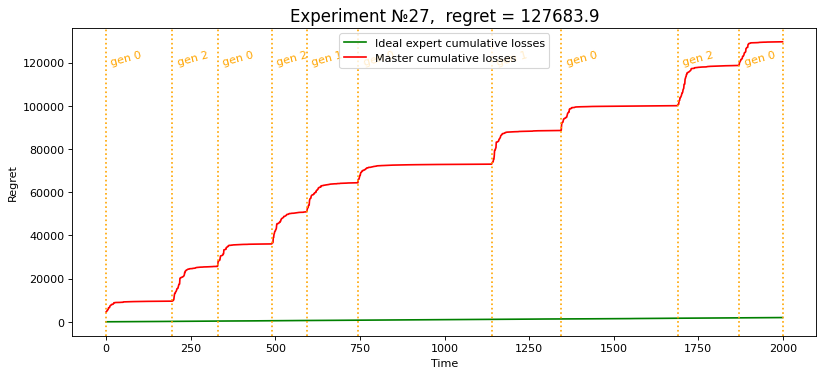

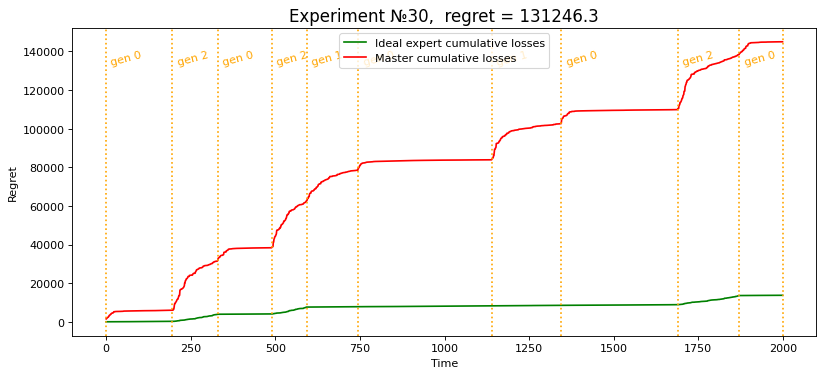

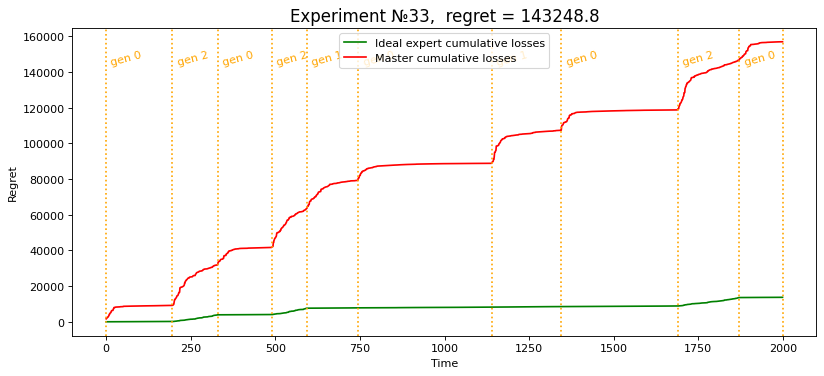

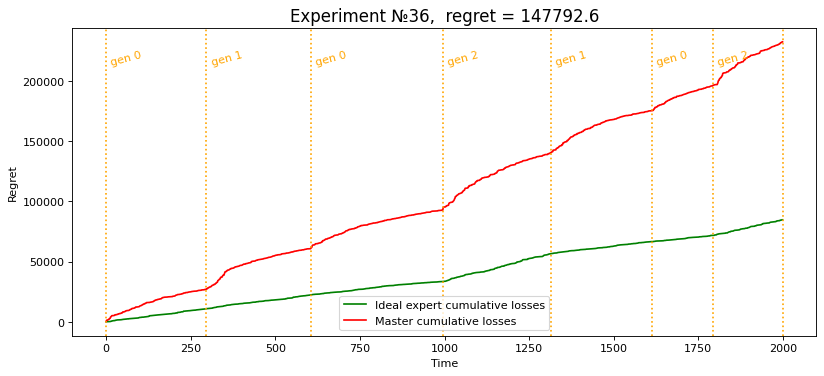

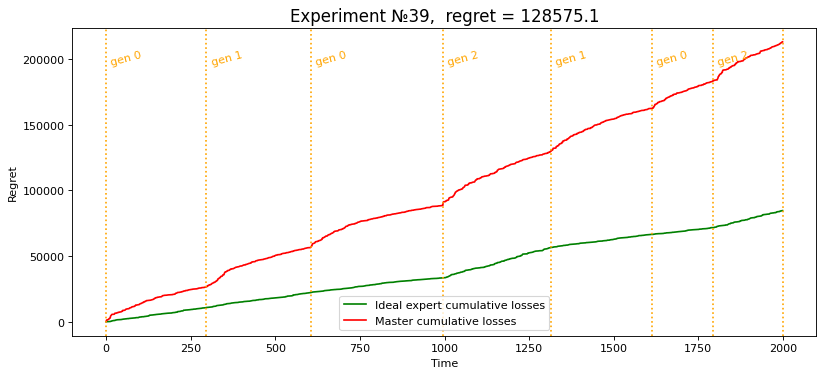

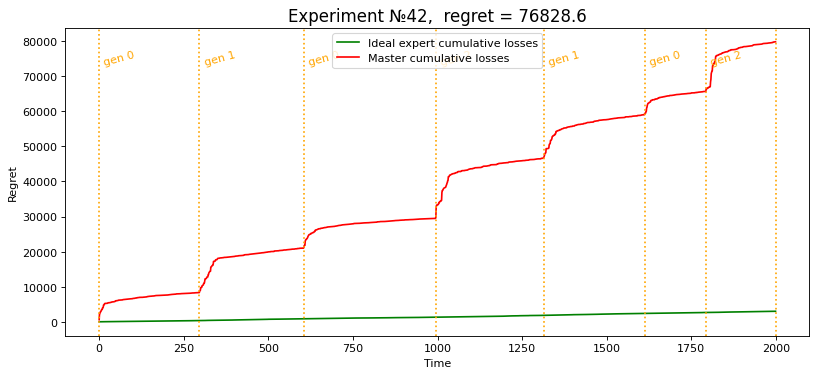

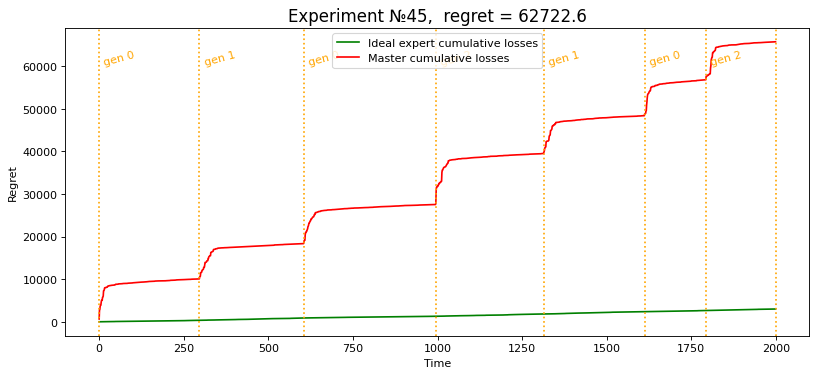

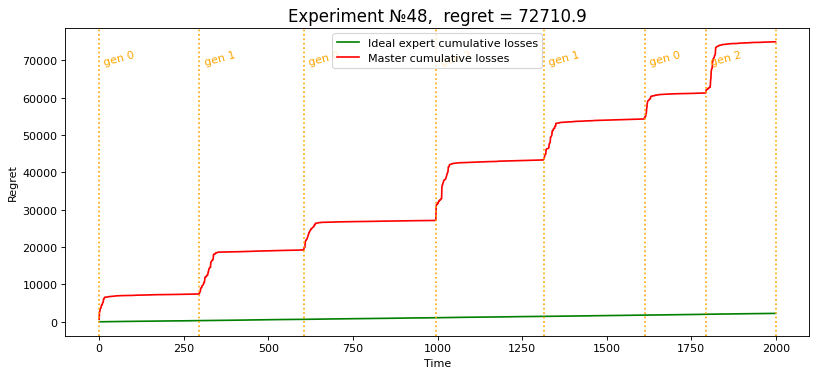

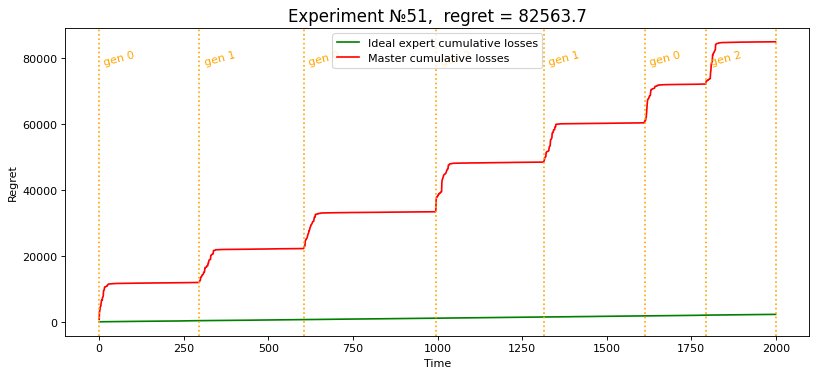

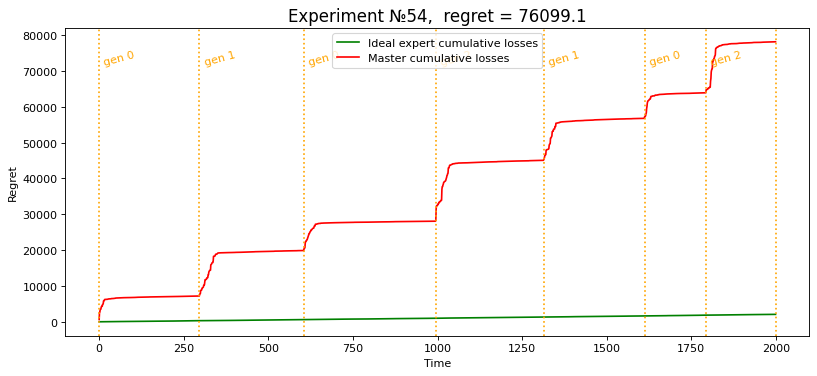

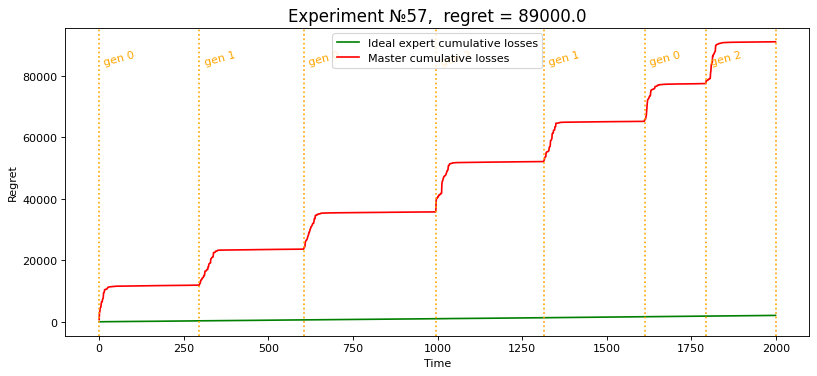

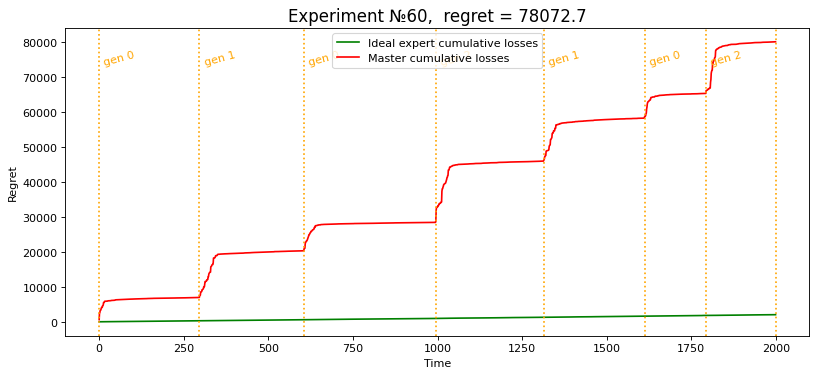

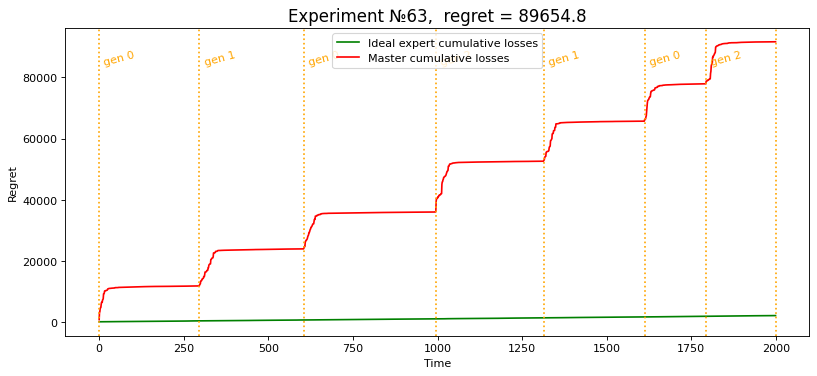

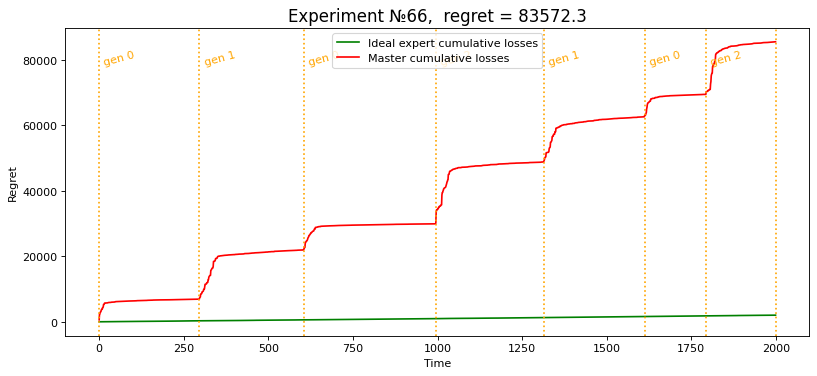

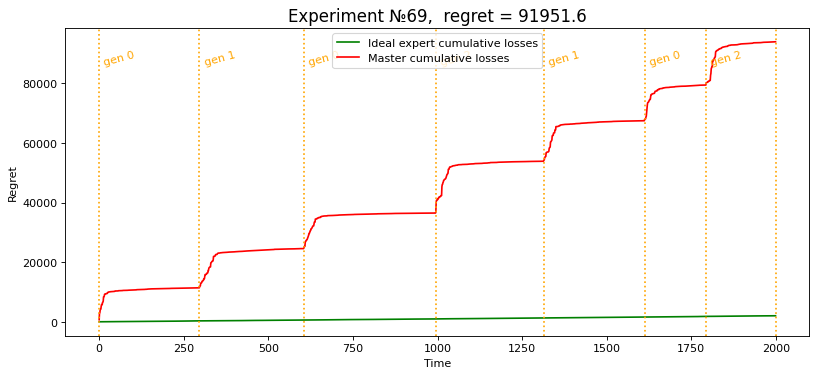

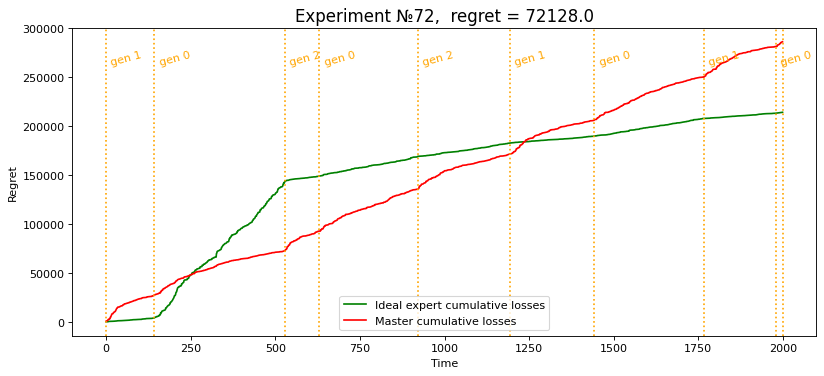

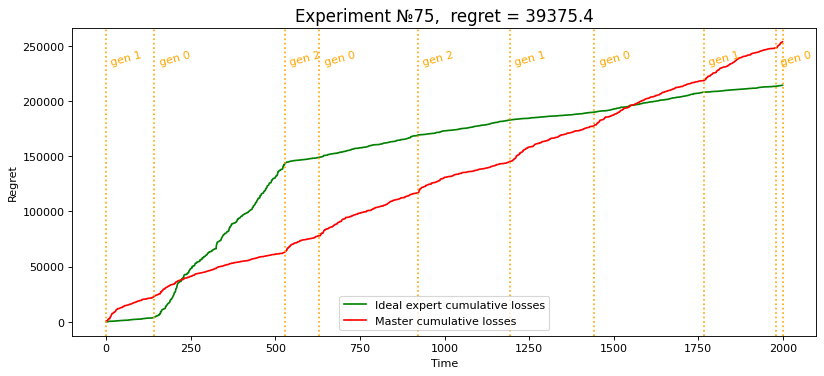

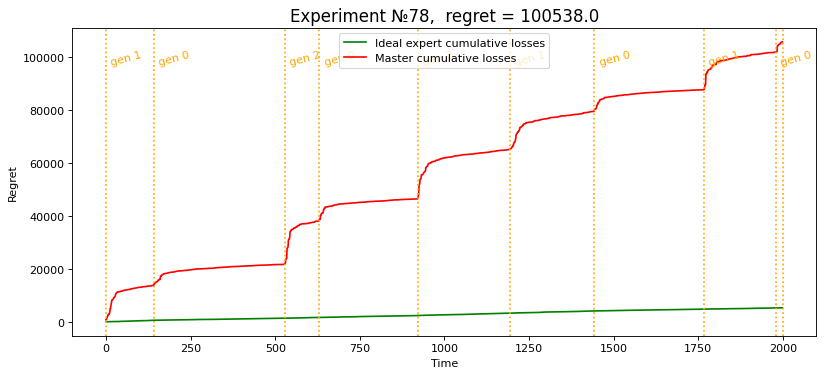

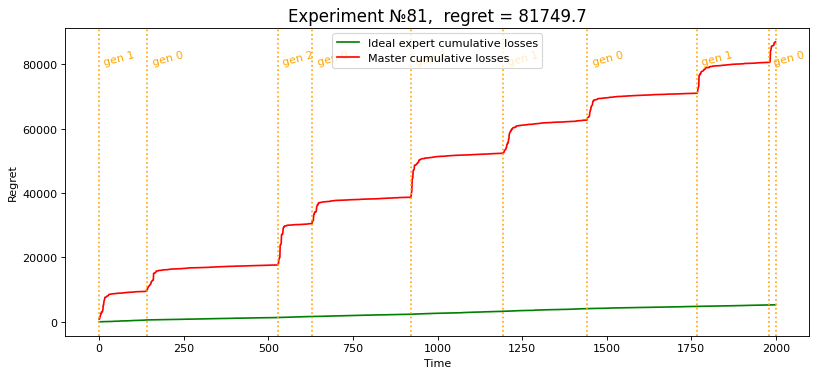

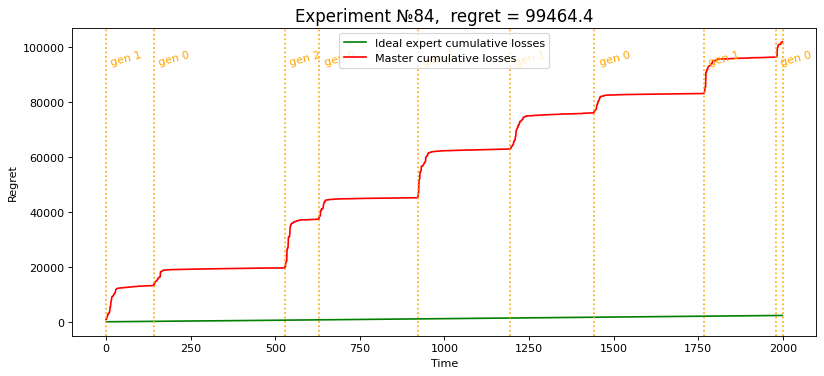

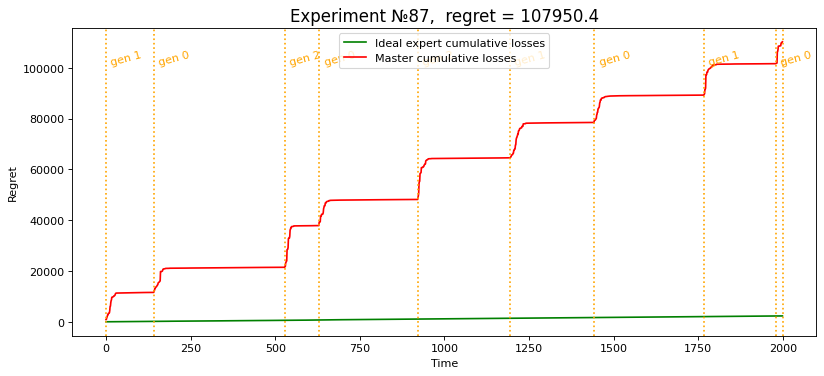

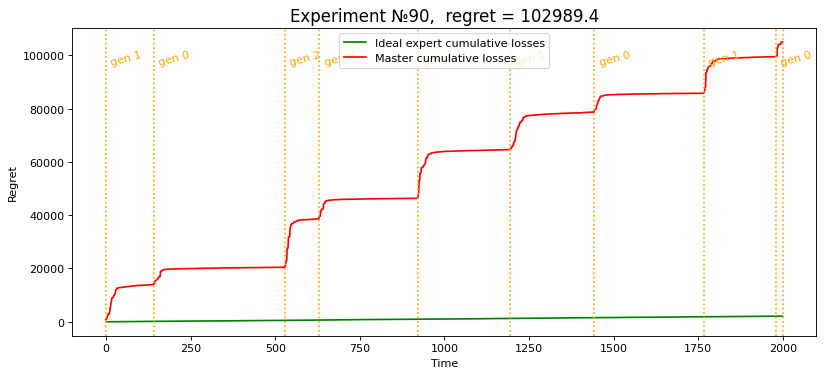

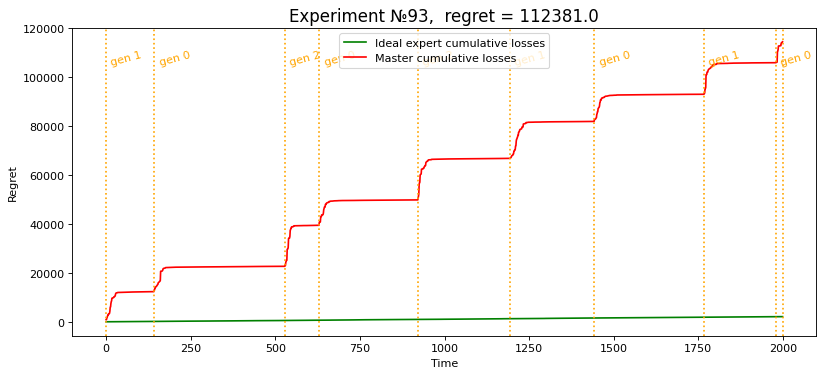

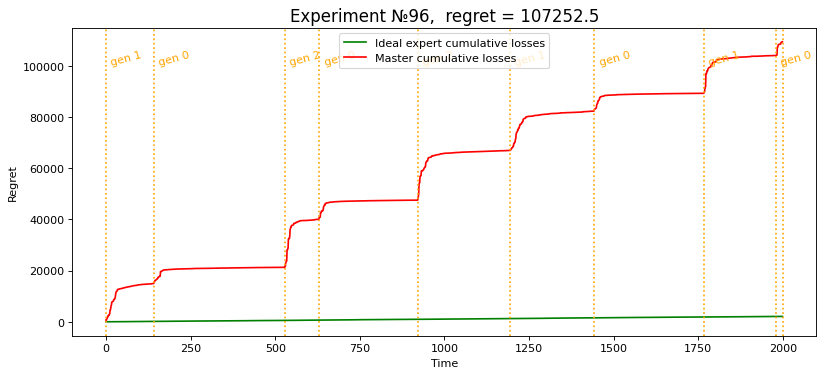

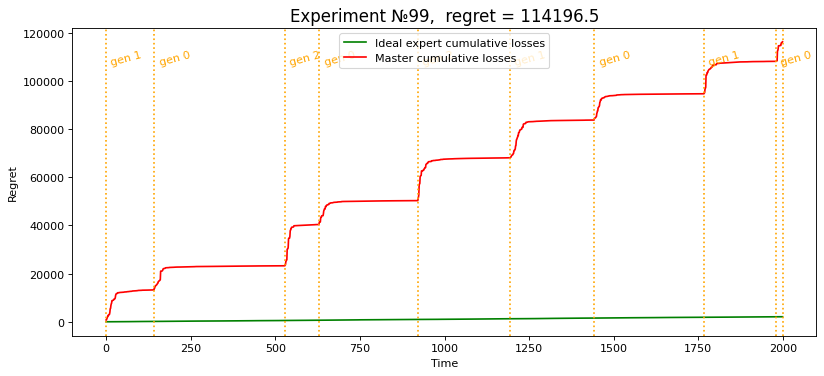

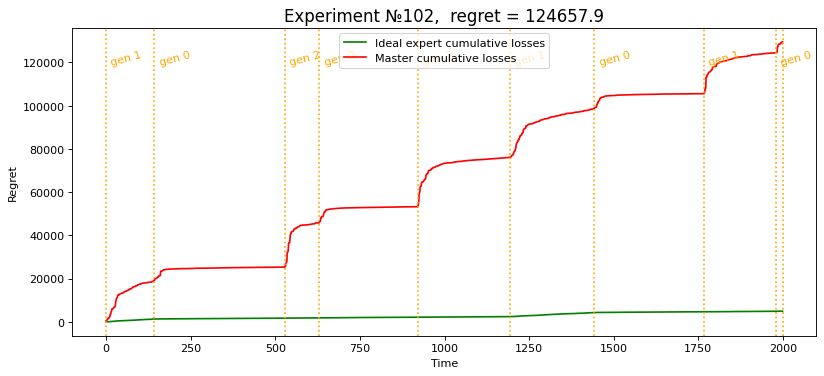

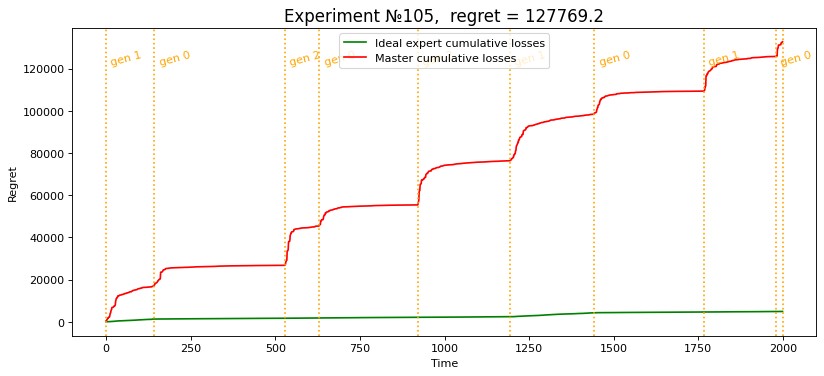

In [22]:
enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
for num, experiment in enumerated[::3]:
    draw_regrets(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

In [23]:
ex = experiments[7]
ex.random_seed

121

In [24]:
ex.to_dict().keys()

dict_keys(['filepath', 'random_seed', 'key_w', 'key_a', 'train_window', 'noise_var', 'params', 'logs', 'regret'])

In [25]:
ex.key_w, ex.key_a, ex.train_window, ex.params

('diverge_01',
 'default',
 10,
 Params(series_type='default', from_start=False, a=-40, b=40, dim=10, low=-10, high=10, clip=(-40, 40), workers_num=3, length=2000, lower_bound=100, upper_bound=400, alternating=True))